## Dynamic signal timing for AADT data to avoid traffic congestion

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Read the AADT dataset
df = pd.read_csv('D:\\Study\\DataScience\\Data\\MachineLearningData\\TrafficData\\aadt.csv')

In [76]:
# Create a function to convert 'location' column value -- POINT(-78.594915 42.728258) into 'lat' 'long' columns
# Here we are using simple string manipulations in Python to extracl lat long values
# We can also use Regex to extract the same
def lat_long(col):
    string = col.split('POINT(')[-1]
    string = string.split(')')[0]
    string = string.split(' ')
    lat = float(string[1])
    long = float(string[0])
    return lat, long

In [94]:
# Create lat long columns into the dataframe using lat_long function
df['lat'], df['long'] = zip(*df['location'].map(lat_long))

In [95]:
df.head()

,local_id,county,municipality,on,from,to,approach,at,direction,aadt_year,aadt,aadt_cars,aadt_trucks,location,lat,long
0,530233,ERIE,AURORA,OLEAN RD,START OLAP RT 400 EXPWY,END OLAP RT 400 EWPWY {CONFLICTS W/OTHER 1090},BETWEEN,NaN,2-WAY,1981-01-01T00:00:00,6550,NaN,NaN,POINT(-78.594915 42.728258),42.728258,-78.594915
1,530064,ERIE,WALES,OLEAN RD,WARNER HILL RD,START OLAP RT 400 EXPWY,BETWEEN,NaN,2-WAY,2001-01-01T00:00:00,12200,NaN,NaN,POINT(-78.57771635 42.70977364),42.709774,-78.577716
2,533061,ERIE,BUFFALO,I-190 @ SOUTH OGDEN ST,NaN,NaN,NaN,GRISWOLD ST TO I-190 SB (ON),RAMP,2009-01-01T00:00:00,6267,5693.0,573.0,POINT(-78.799448 42.875776),42.875776,-78.799448
3,530150,ERIE,BUFFALO,KENSINGTON EXPWY,JEFFERSON AV,BEST ST,BETWEEN,NaN,2-WAY,1977-01-01T00:00:00,47000,NaN,NaN,POINT(-78.84958774 42.89957233),42.899572,-78.849588
4,534497,ERIE,AMHERST,KENSINGTON AVE,CHKTG/AMHERST TOWN LN,RT 240 HARLEM RD,BETWEEN,NaN,2-WAY,1991-01-01T00:00:00,9700,NaN,NaN,POINT(-78.78539912 42.9494342),42.949434,-78.785399


## Read the hourly toll collection at the toll plaza

In [2]:
# Read the hourly traffic dataset
df2 = pd.read_csv('D:\\Study\\DataScience\\Data\\MachineLearningData\\TrafficData\\ahdt.csv')

In [3]:
data = df2

In [4]:
data['plaza_id'].value_counts()

9     135552
3     135552
1     130896
2     130896
5     128688
6     128688
7     123072
8     122784
4     120624
11     66000
24     23134
27     23134
28     23134
26     23086
25     22875
29     22120
23     22012
21     14162
22     11567
30     11565
Name: plaza_id, dtype: int64

In [6]:
df2.groupby(['plaza_id', 'direction'])['vehicles_etc_e_zpass', 'vehicles_cash_vtoll'].sum()

vehicles_etc_e_zpass  vehicles_cash_vtoll
plaza_id direction                                           
1        I                      76693512             28020306
         O                      80949574             28600810
2        I                     111306265             21489436
         O                      87072214             18176164
3        I                     118110611             35099499
         O                     127503370             37398487
4        I                      72569914             11713125
         O                      62572341              9684737
5        I                      24260912              4013094
         O                      24342025              3992959
6        I                      24095986              5230696
         O                      22900356              4733539
7        I                      93366296             15407976
         O                      79531658             11178778
8        I                      56226049              8173240
         O                      49878283              6194983
9        I                     127180599             28763742
         O                     132770588             28989775
11       I                     212093356             40282965
21       I                      52019033              7962305
         O                       6194459              1003449
22       O                      17703465              2520928
23       I                      25128450              4313321
         O                      26105544              4137004
24       I                      16255688              1949299
         O                      13989149              1679823
25       I                       4720893               512150
         O                       4793654               435552
26       I                       4709258               632292
         O                       5094436               691195
27       I                      17230096              2485397
         O                      14748830              1830028
28       I                      11349409              1185260
         O                      11249864              1119248
29       I                      22740384              3655781
         O                      25689918              3537322
30       O                      44674788              4599352

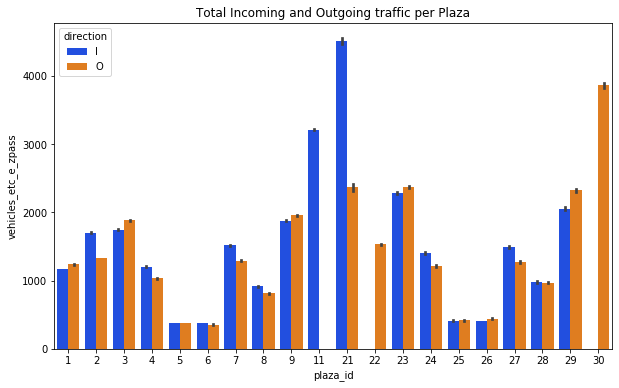

In [10]:
sns.set_palette("bright")
plt.figure(figsize=(10, 6))
sns.barplot(x='plaza_id', y='vehicles_etc_e_zpass', hue='direction', data=data)
plt.title('Total Incoming and Outgoing traffic per Plaza')
plt.show()

In [5]:
# Selecting records for last plaza 30
data_30 = data[data['plaza_id'] == 30]

In [6]:
# Checking the number of dates for plaza 30
data_30['date'].value_counts()

2018-07-05    24
2018-05-26    24
2018-06-18    24
2018-08-20    24
2018-10-07    24
              ..
2018-12-08    24
2018-03-23    24
2018-08-12    24
2018-03-11    23
2018-11-04    22
Name: date, Length: 482, dtype: int64

In [11]:
# Selecting records for last plaza 30 and a singe day '2019-03-02'
data_single = data[(data['plaza_id'] == 30) & (data['date'] == '2019-03-02')]

<function matplotlib.pyplot.show(*args, **kw)>

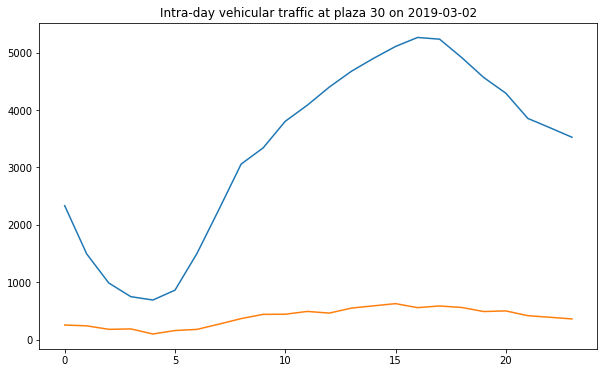

In [38]:
# Visulalize the intra-day traffice of vehicles for a single day
plt.figure(figsize=(10,6))
plt.plot(data_single['hour'], data_single['vehicles_etc_e_zpass'])
plt.plot(data_single['hour'], data_single['vehicles_cash_vtoll'])
plt.title('Intra-day vehicular traffic at plaza 30 on 2019-03-02')
plt.show

In [7]:
# Selecting records for last plaza 30
data_28 = data[data['plaza_id'] == 28]

In [8]:
data_28

,plaza_id,date,hour,direction,vehicles_etc_e_zpass,vehicles_cash_vtoll
288,28,2019-03-02,0,I,181,29
289,28,2019-03-02,0,O,758,85
290,28,2019-03-02,1,I,119,18
291,28,2019-03-02,1,O,354,45
292,28,2019-03-02,2,I,61,4
...,...,...,...,...,...,...
198776,28,2017-09-03,21,O,1010,185
198777,28,2017-09-03,22,I,556,94
198778,28,2017-09-03,22,O,818,143
198779,28,2017-09-03,23,I,384,85


In [9]:
# Filter the dataframe for plaza 28 with Outgoing vehicles and sort according to date and hours
data_28_sorted = data_28[data_28['direction'] == 'O'].sort_values(['date', 'hour'], ascending=[False, True])

In [10]:
# Reset index
data_28_sorted.reset_index(inplace=True)

In [11]:
# Create a new column with total and remove unnecessory columns
data_28_sorted['vehicles_total'] = data_28_sorted['vehicles_etc_e_zpass'] + data_28_sorted['vehicles_cash_vtoll']

# Remove columns
data_28_sorted = data_28_sorted.drop(['index', 'plaza_id', 'direction', 'vehicles_etc_e_zpass', 'vehicles_cash_vtoll'], axis = 1)


In [12]:
data_28_sorted

,date,hour,vehicles_total
0,2019-03-02,0,843
1,2019-03-02,1,399
2,2019-03-02,2,246
3,2019-03-02,3,173
4,2019-03-02,4,125
...,...,...,...
11562,2017-09-03,19,1539
11563,2017-09-03,20,1382
11564,2017-09-03,21,1195
11565,2017-09-03,22,961


In [13]:
# create an array of dates starting at '2019-01-21', per hour
rng = pd.date_range('2019-01-01', periods=len(data_28_sorted), freq='H')

data_28_sorted['time'] = rng

In [14]:
# Drop date and hour columns
data_28_sorted = data_28_sorted.drop(['date', 'hour'], axis = 1)

In [15]:
data_28_sorted

,vehicles_total,time
0,843,2019-01-01 00:00:00
1,399,2019-01-01 01:00:00
2,246,2019-01-01 02:00:00
3,173,2019-01-01 03:00:00
4,125,2019-01-01 04:00:00
...,...,...
11562,1539,2020-04-26 18:00:00
11563,1382,2020-04-26 19:00:00
11564,1195,2020-04-26 20:00:00
11565,961,2020-04-26 21:00:00


In [16]:
# Extract last 1000 rows and plot
data_time = data_28_sorted.iloc[-1000:, :]

In [17]:
# Set index as time
data_time.set_index("time", inplace = True)

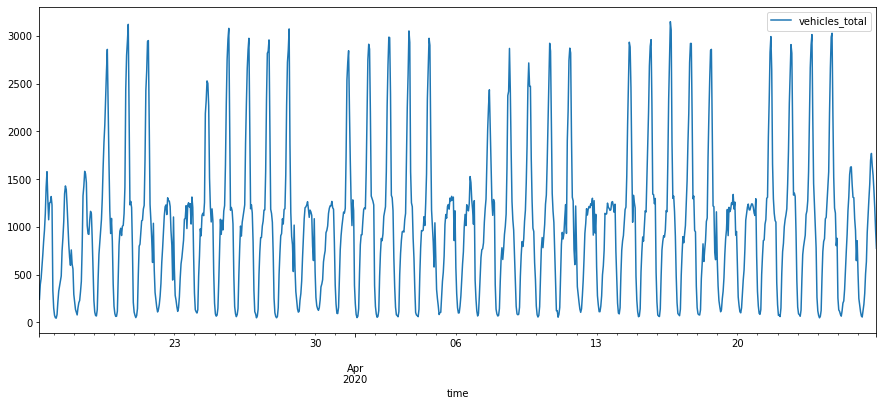

In [18]:
# Plot the dataframe to visualize time series data
data_time.plot(figsize=(15, 6))
plt.show()

In [19]:
# Save cleaned data into csv file
data_time.to_csv('D:\\Study\\DataScience\\Data\\MachineLearningData\\TrafficData\\hourlydata.csv')

# Time series modelling to predict vehicular traffic at a toll plaza

In [36]:
# Import statmdoels for timeseries
import statsmodels.api as sm

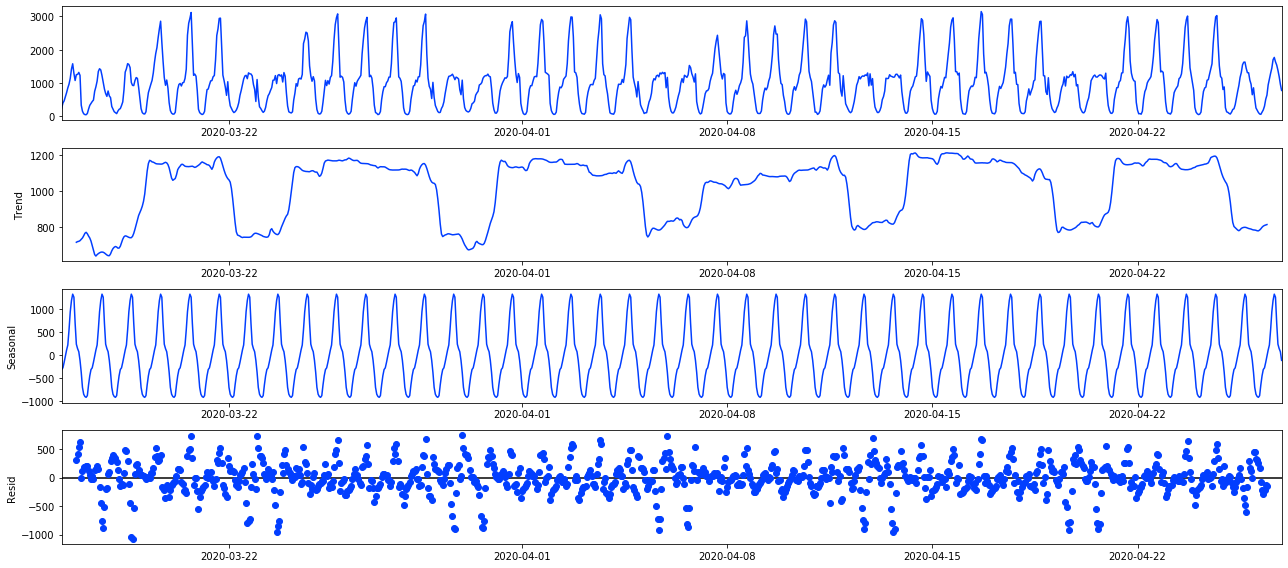

In [37]:
# Use decomposition method to visualize the various components of time series data
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data_time, model='additive')
fig = decomposition.plot()
plt.show()

## Use ARIMA for time series modelling

In [59]:
import itertools

p = d = q = range(0, 3)
#p = d = q = (0, 1, 2, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...\n')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [ ]:
# Perform Grid Search to find optimal parameters for ARIMA

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_time, order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA {} x {} X 12 - AIC:{}'.format(param, param_seasonal, np.round(results.aic,2)))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12) X 12 - AIC:17106.34
ARIMA (0, 0, 0) x (0, 0, 1, 12) X 12 - AIC:16851.79
ARIMA (0, 0, 0) x (0, 0, 2, 12) X 12 - AIC:15624.98
ARIMA (0, 0, 0) x (0, 1, 0, 12) X 12 - AIC:17101.44
ARIMA (0, 0, 0) x (0, 1, 1, 12) X 12 - AIC:15712.61
ARIMA (0, 0, 0) x (0, 1, 2, 12) X 12 - AIC:15160.7
ARIMA (0, 0, 0) x (0, 2, 0, 12) X 12 - AIC:18231.16
ARIMA (0, 0, 0) x (0, 2, 1, 12) X 12 - AIC:16738.74
ARIMA (0, 0, 0) x (0, 2, 2, 12) X 12 - AIC:15419.97
ARIMA (0, 0, 0) x (1, 0, 0, 12) X 12 - AIC:16762.55
ARIMA (0, 0, 0) x (1, 0, 1, 12) X 12 - AIC:15908.95
ARIMA (0, 0, 0) x (1, 0, 2, 12) X 12 - AIC:15434.46
ARIMA (0, 0, 0) x (1, 1, 0, 12) X 12 - AIC:14422.15
ARIMA (0, 0, 0) x (1, 1, 1, 12) X 12 - AIC:14409.34
ARIMA (0, 0, 0) x (1, 1, 2, 12) X 12 - AIC:14239.63
ARIMA (0, 0, 0) x (1, 2, 0, 12) X 12 - AIC:14882.83
ARIMA (0, 0, 0) x (1, 2, 1, 12) X 12 - AIC:14293.84
ARIMA (0, 0, 0) x (1, 2, 2, 12) X 12 - AIC:14114.22
ARIMA (0, 0, 0) x (2, 0, 0, 12) X 12 - AIC:14416.31
ARIMA (0, 0, 

Minimum AIC value is at ARIMA (1, 0, 1) x (1, 1, 2, 12) X 12 - **AIC:12932.56**

In [55]:
# From the above results """ARIMA (0, 1, 1) x (1, 1, 1, 12) X 12 - AIC:920.32""" gives the mimimum AIC value

mod = sm.tsa.statespace.SARIMAX(data_time,order=(1, 0, 1), seasonal_order=(1, 1, 3, 12),
                                            enforce_stationarity=False, enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7179      0.021     34.079      0.000       0.677       0.759
ma.L1          0.2797      0.033      8.524      0.000       0.215       0.344
ar.S.L12      -1.0003      0.001   -672.082      0.000      -1.003      -0.997
ma.S.L12      -0.0148      0.086     -0.171      0.864      -0.184       0.155
ma.S.L24      -0.9961      0.103     -9.637      0.000      -1.199      -0.793
ma.S.L36      -0.0088      0.067     -0.130      0.896      -0.141       0.123
sigma2      3.672e+04   3996.765      9.186      0.000    2.89e+04    4.45e+04


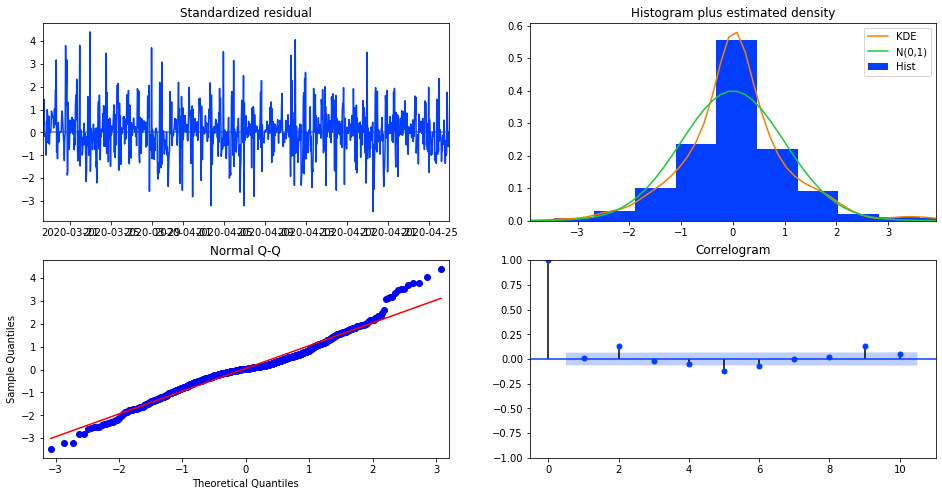

In [56]:
# Run model diagonstics
results.plot_diagnostics(figsize=(16, 8))
plt.show()

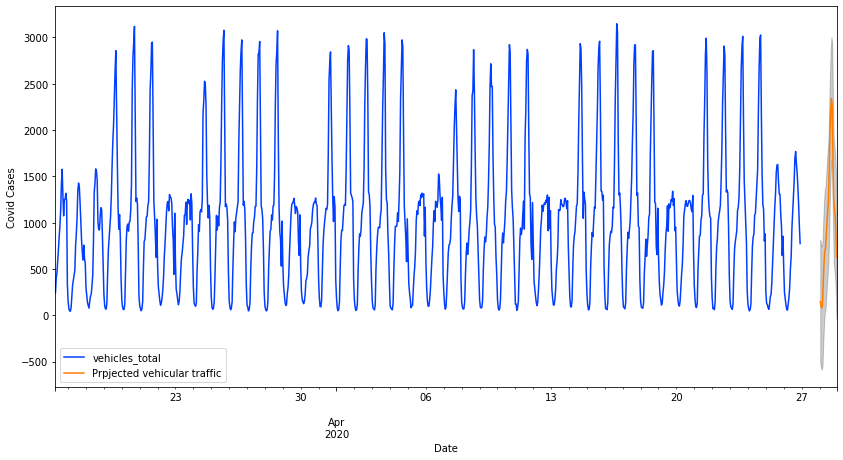

In [57]:

# Creating a dataframe to forecast covid cases for 5 days in future
date_range = ['2020-04-28 01:00:00', '2020-04-28 02:00:00', '2020-04-28 03:00:00', '2020-04-28 04:00:00', 
              '2020-04-28 05:00:00', '2020-04-28 06:00:00', '2020-04-28 07:00:00', '2020-04-28 08:00:00',
              '2020-04-28 09:00:00', '2020-04-28 10:00:00', '2020-04-28 11:00:00', '2020-04-28 12:00:00',
              '2020-04-28 13:00:00', '2020-04-28 14:00:00', '2020-04-28 15:00:00', '2020-04-28 16:00:00',
              '2020-04-28 17:00:00', '2020-04-28 18:00:00', '2020-04-28 19:00:00', '2020-04-28 20:00:00',
              '2020-04-28 21:00:00', '2020-04-28 22:00:00', '2020-04-28 23:00:00',]

pred_df = pd.DataFrame(columns=['lower_pred', 'mean_pred', 'higher_pred'])

for date in date_range:
    pred = results.get_prediction(start=pd.to_datetime(date), dynamic=False)
    pred_ci = pred.conf_int()
    lower_pred = pred_ci.iloc[0][0]
    higher_pred = pred_ci.iloc[0][1]
    mean_pred = pred.predicted_mean[0]
  
    pred_df = pred_df.append({'lower_pred': lower_pred, 'mean_pred': mean_pred, 'higher_pred': higher_pred}, ignore_index = True)

index = pd.to_datetime(date_range)
pred_df.index = index

# Plotting the predicted cases along with confirmed cases
ax = data_time.plot(label='Intra-day vehicular traffic', figsize=(14, 7))
ax = pred_df.iloc[:,1].plot(label='Prpjected vehicular traffic')
ax.fill_between(pred_df.index, pred_df.iloc[:, 0], pred_df.iloc[:, 2], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Covid Cases')
plt.legend()
plt.show()

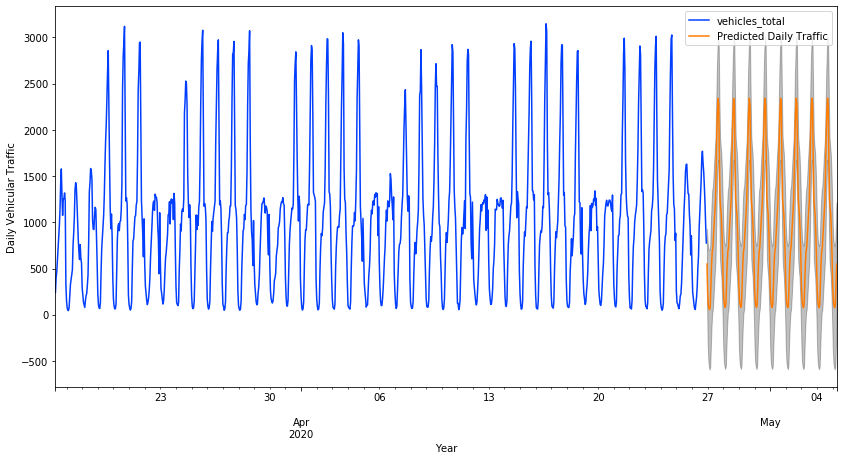

In [58]:
# Producing and visualizing forecasts

pred_uc = results.get_forecast(steps=200)
pred_ci = pred_uc.conf_int()
ax = data_time.plot(label='Observed Passengers', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Predicted Daily Traffic')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Daily Vehicular Traffic')
plt.legend()
plt.show()